In [1]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


'''# 字符类型的时间
tss1 = '2010/04/09 04:44:11'
'''

#converters强制每个标签的数值类型
sheet = pd.read_excel('flare_euv.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str,'CLASS':str,'SIGN':int,'CLASS_N':float,'SUB':float,'STARTF':float,'ENDF':float,'CON':float,'T_D':int,'SIGN_2':int,'YEAR':float})
sheet1 = pd.read_excel('flare_x.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str})
#print(type(sheet1['PEAKT'][0]))
#print(type(sheet['PEAKT'][0]))
sheet1.head()

i=0
j=0

while(sheet['N'][i]!=0):
    

    euv_start=sheet['DATE'][i].split(' ')[0]+' '+sheet['START'][i]  #将日期和时间整理拼接成字符串
    euv_peakt=sheet['DATE'][i].split(' ')[0]+' '+sheet['PEAKT'][i]
    euv_endt=sheet['DATE'][i].split(' ')[0]+' '+sheet['ENDT'][i]
    #print(type(sheet1['DATE'][j]))
    #print(j)
    #print(i)
    x_peakt=sheet1['DATE'][j].split(' ')[0]+' '+sheet1['PEAKT'][j]
#print(euv_start)
    timeArray1 = time.strptime(euv_start, "%Y-%m-%d %H:%M:%S")
    timeStamp1 = int(time.mktime(timeArray1))

    timeArray2 = time.strptime(euv_peakt, "%Y-%m-%d %H:%M:%S")
    timeStamp2 = int(time.mktime(timeArray2))

    timeArray3 = time.strptime(euv_endt, "%Y-%m-%d %H:%M:%S")
    timeStamp3 = int(time.mktime(timeArray3))


    timeArray4 = time.strptime(x_peakt, "%d-%m-%Y %H:%M:%S")  #将日期转化为TAI，秒数格式，唯一识别
    timeStamp4 = int(time.mktime(timeArray4))

    if(timeStamp4>timeStamp1) and (timeStamp4<timeStamp3): #比较x的峰值时间是否在ly耀斑的起始和结束时间段内
        #sheet['CLASS'][i]=sheet1['CLASS'][j]
        sheet.loc[i,('CLASS')]=sheet1['CLASS'][j]
        t_d=timeStamp2-timeStamp4
        sheet.loc[i,('T_D')]=t_d
        if(t_d>=200) or (t_d<=-200): #筛选峰值差大的
            sheet.loc[i,('SIGN_2')]=1
        elif (t_d>=-10) and (t_d<=10): #筛选峰值差小
            sheet.loc[i,('SIGN_2')]=2
            
        i=i+1
        j=j+1
    elif timeStamp4<timeStamp1:
        j=j+1
    else:
        i=i+1


k=0
while(sheet['N'][k]!=0):
    if(sheet['CLASS'][k][0]=='M') or (sheet['CLASS'][k][0]=='X') or (sheet['CLASS'][k][0]=='0'):
        sheet.loc[k,('SIGN')]=2  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
    elif sheet['CLASS'][k][0]=='B':#取得耀斑级别对应峰值流量
        num=float(sheet['CLASS'][k][1:]) #截取字符串
        #rate=sheet['SIGNIF(%)'][k]/num#rate率越大，Ly与x差异越大
        num=round(num*(10)**(-7),10)
        sheet.loc[k,('CLASS_N')]=num
        #sheet.loc[k,('RATE')]=rate
        sheet.loc[k,('SIGN')]=1  #将B级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet['CLASS'][k][0]=='C':
        num=float(sheet['CLASS'][k][1:])
        num=round(num*(10)**(-6),10) #取得耀斑级别对应峰值流量,round控制小数位数
        sheet.loc[k,('CLASS_N')]=num #将峰值流量值做成科学计数法，放到CLASS_N标签中
        k=k+1
    else:
        k=k+1

        
l=0        
while(sheet['N'][l]!=0):
    sheet.loc[l,('DATE')]=sheet['DATE'][l].split(' ')[0]  #将列表中日期后的许多0去掉，美化
    l=l+1
    #print(l)

m=0
while(sheet['N'][m]!=0):
    #print(m)
    groud=max(sheet['STARTF'][m],sheet['ENDF'][m])#选取开始或结束中
    #print(type(groud))
    con=sheet['PEAKF'][m]/groud #相对背景的比值
    sub=sheet['PEAKF'][m]-groud #减掉背景后
    sub=round(sub*(10)**(-3),10)
    con=round(con,6)
    sheet.loc[m,('SUB')]=sub
    sheet.loc[m,('CON')]=con
    m=m+1
    
q=0
while(sheet['N'][q]!=0):
    if(sheet['CLASS'][q][0]=='B'):
        rate=sheet['SUB'][q]/sheet['CLASS_N'][q]
        #sheet.loc[q,('RATE')]=rate  #将M和X级耀斑做标记，后期去掉
        q=q+1
        #print(k)
    else:
        q=q+1

#sheet.head(50)
sheet_new=sheet
sheet_new=sheet_new[sheet_new['SIGN'] != 2]

sheet_new_B=sheet_new
sheet_new_B=sheet_new_B[sheet_new_B['SIGN'] == 1]
sheet_new_C=sheet_new
sheet_new_C=sheet_new_C[sheet_new_C['SIGN'] == 0]




print(len(sheet_new_B))
sheet_new_B.head(50)

100


,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,SIGNIF(%),CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR
0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,1.5752,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,0.0
2,3,2010-06-09,08:40:46,08:50:36,09:04:38,23.9,6.0453,6.1144,6.0513,1.0426,B2.5,1,2.500000e-07,0.000063,1.010428,276,1,0.0
10,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,0.9599,B4.8,1,4.800000e-07,0.000061,1.009587,-57,0,0.0
29,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,0.8663,B5.1,1,5.100000e-07,0.000059,1.008652,-69,0,0.0
30,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,0.8334,B3.6,1,3.600000e-07,0.000056,1.008334,-291,1,0.0
32,33,2010-10-26,03:13:04,03:15:03,03:57:19,44.2,6.7787,6.8351,6.6911,0.8316,B6.3,1,6.300000e-07,0.000056,1.008320,-57,0,0.0
38,39,2010-11-10,16:33:01,16:38:17,16:47:46,14.7,6.7829,6.8552,6.7955,0.8792,B9.0,1,9.000000e-07,0.000060,1.008785,-43,0,0.0
44,45,2010-11-16,02:58:48,03:07:32,03:21:34,22.8,6.8655,6.9568,6.8750,1.1909,B3.8,1,3.800000e-07,0.000082,1.011898,332,1,0.0
51,52,2011-01-04,09:42:01,09:48:01,09:57:28,15.5,6.9986,7.0720,7.0114,0.8648,B6.4,1,6.400000e-07,0.000061,1.008643,61,0,0.0
59,60,2011-01-26,22:02:45,22:10:24,22:20:14,17.5,6.4138,6.5037,6.4266,1.1988,B3.2,1,3.200000e-07,0.000077,1.011997,84,0,0.0


In [2]:
#筛选出峰值时间差在一定范围内的耀斑
sheet_new_B_1=sheet
sheet_new_B_1=sheet_new_B[sheet_new_B['SIGN_2'] == 1]
print(len(sheet_new_B_1))
sheet_new_B_1.head(50)

31


,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,SIGNIF(%),CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR
0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,1.5752,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,0.0
2,3,2010-06-09,08:40:46,08:50:36,09:04:38,23.9,6.0453,6.1144,6.0513,1.0426,B2.5,1,2.500000e-07,0.000063,1.010428,276,1,0.0
30,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,0.8334,B3.6,1,3.600000e-07,0.000056,1.008334,-291,1,0.0
44,45,2010-11-16,02:58:48,03:07:32,03:21:34,22.8,6.8655,6.9568,6.8750,1.1909,B3.8,1,3.800000e-07,0.000082,1.011898,332,1,0.0
69,70,2011-02-11,21:40:18,21:42:06,21:57:13,16.9,6.8625,6.9302,6.8658,0.9388,B5.0,1,5.000000e-07,0.000064,1.009380,-894,1,0.0
70,71,2011-02-12,10:49:37,10:54:54,11:08:21,18.7,6.8957,6.9570,6.8861,0.8885,B2.3,1,2.300000e-07,0.000061,1.008890,234,1,0.0
343,344,2011-12-18,11:36:05,11:41:23,11:48:49,12.7,8.3498,8.4847,8.4017,0.9881,B7.8,1,7.800000e-07,0.000083,1.009879,-217,1,0.0
433,434,2012-03-29,23:13:22,23:18:28,23:26:06,12.7,7.5393,7.6381,7.5428,1.2635,B6.2,1,6.200000e-07,0.000095,1.012635,-272,1,0.0
434,435,2012-04-08,18:45:18,18:49:18,19:12:04,26.8,7.0618,7.1290,7.0583,0.9516,B6.8,1,6.800000e-07,0.000067,1.009516,-222,1,0.0
518,519,2012-06-28,16:04:25,16:11:21,16:33:54,29.5,7.0936,7.4203,7.0721,4.6061,B6.4,1,6.400000e-07,0.000327,1.046056,321,1,0.0


In [3]:
#筛选出峰值时间差在一定范围内的耀斑
sheet_new_B_3=sheet
sheet_new_B_3=sheet_new_B[sheet_new_B['SIGN_2'] == 2]
print(len(sheet_new_B_3))
sheet_new_B_3.head(50)

17


,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,SIGNIF(%),CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,RATE
161,162,2011-03-31,21:31:17,21:39:06,21:54:13,22.9,7.5492,7.6405,7.5427,1.2103,B7.0,1,7.000000e-07,0.000091,1.012094,6,2,0.0
393,394,2012-02-10,18:26:42,18:31:04,18:38:43,12.0,7.3815,7.4550,7.3850,0.9470,B9.9,1,9.900000e-07,0.000070,1.009479,4,2,0.0
641,642,2012-08-02,15:24:33,15:29:08,15:40:24,15.8,7.6660,7.7455,7.6733,0.9416,B9.6,1,9.600000e-07,0.000072,1.009409,8,2,0.0
729,730,2012-12-21,06:07:15,06:12:53,06:25:59,18.7,7.7400,7.8400,7.7363,1.2915,B6.8,1,6.800000e-07,0.000100,1.012920,-7,2,0.0
812,813,2013-04-22,04:37:47,04:46:09,05:03:49,26.0,6.8158,6.9026,6.8045,1.2746,B6.3,1,6.300000e-07,0.000087,1.012735,9,2,0.0
1286,1287,2014-04-13,02:38:33,02:45:06,03:02:02,23.5,7.8076,7.9032,7.8156,1.1219,B8.3,1,8.300000e-07,0.000088,1.011208,6,2,0.0
1312,1313,2014-05-01,01:34:35,01:42:03,02:02:59,28.4,7.6920,7.7800,7.7001,1.0378,B7.2,1,7.200000e-07,0.000080,1.010376,3,2,0.0
1418,1419,2014-08-20,00:02:57,00:08:58,00:21:11,18.2,7.1983,7.2917,7.1780,1.2975,B9.5,1,9.500000e-07,0.000093,1.012975,-2,2,0.0
1801,1802,2015-08-21,00:27:57,00:29:58,00:47:47,19.8,6.8672,6.9484,6.8714,1.1194,B9.7,1,9.700000e-07,0.000077,1.011206,-2,2,0.0
1820,1821,2015-08-25,03:22:33,03:29:50,03:38:11,15.6,7.0977,7.2218,7.1533,0.9565,B8.7,1,8.700000e-07,0.000068,1.009576,-10,2,0.0


In [6]:
sheet_new_B_2=sheet
sheet_new_B_2=sheet_new_B[sheet_new_B['SIGN_2'] != 1]
print(len(sheet_new_B_2))
sheet_new_B_2.head(50)

52


,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,SIGNIF(%),CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,RATE
0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,1.5752,B3.7,1,3.700000e-07,0.000100,1.015740,-233,0,0.0
10,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,0.9599,B4.8,1,4.800000e-07,0.000061,1.009587,-57,0,0.0
29,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,0.8663,B5.1,1,5.100000e-07,0.000059,1.008652,-69,0,0.0
30,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,0.8334,B3.6,1,3.600000e-07,0.000056,1.008334,-291,0,0.0
32,33,2010-10-26,03:13:04,03:15:03,03:57:19,44.2,6.7787,6.8351,6.6911,0.8316,B6.3,1,6.300000e-07,0.000056,1.008320,-57,0,0.0
38,39,2010-11-10,16:33:01,16:38:17,16:47:46,14.7,6.7829,6.8552,6.7955,0.8792,B9.0,1,9.000000e-07,0.000060,1.008785,-43,0,0.0
69,70,2011-02-11,21:40:18,21:42:06,21:57:13,16.9,6.8625,6.9302,6.8658,0.9388,B5.0,1,5.000000e-07,0.000064,1.009380,-894,0,0.0
159,160,2011-03-29,00:28:33,00:30:34,00:43:40,15.1,7.4558,7.5406,7.4395,1.1370,B8.6,1,8.600000e-07,0.000085,1.011374,-86,0,0.0
201,202,2011-06-16,23:09:52,23:14:57,23:20:58,11.1,6.7654,6.8784,6.7754,1.5205,B6.3,1,6.300000e-07,0.000103,1.015202,-63,0,0.0
239,240,2011-09-07,18:22:42,18:26:52,18:31:59,9.3,7.0585,7.1534,7.0958,0.8111,B9.1,1,9.100000e-07,0.000058,1.008117,-68,0,0.0


In [4]:
p=0
while(sheet['N'][p]!=0):
    if(sheet['SIGNIF(%)'][p]>=1.4) and (sheet['CLASS'][p][0]=='B'):
        sheet.loc[p,('SIGN_2')]=3  #将
        p=p+1
        
    else:
        p=p+1

sheet_new_B_1=sheet
sheet_new_B_1=sheet_new_B_1[sheet_new_B_1['SIGN_2'] == 3]
print(len(sheet_new_B_1))
sheet_new_B_1.head(50)

12


,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,SIGNIF(%),CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,RATE
0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,1.5752,B3.7,1,3.700000e-07,0.000100,1.015740,-233,3,270.540541
155,156,2011-03-25,02:50:57,02:59:19,03:20:14,29.3,6.6896,6.7906,6.6897,1.5091,B9.5,1,9.500000e-07,0.000101,1.015083,19,3,106.210526
201,202,2011-06-16,23:09:52,23:14:57,23:20:58,11.1,6.7654,6.8784,6.7754,1.5205,B6.3,1,6.300000e-07,0.000103,1.015202,-63,3,163.492063
518,519,2012-06-28,16:04:25,16:11:21,16:33:54,29.5,7.0936,7.4203,7.0721,4.6061,B6.4,1,6.400000e-07,0.000327,1.046056,321,3,510.468750
660,661,2012-08-15,03:38:35,03:44:03,03:56:36,18.0,6.8068,6.9770,6.8611,1.6888,B8.5,1,8.500000e-07,0.000116,1.016892,-117,3,136.352941
686,687,2012-09-13,01:07:26,01:23:28,01:36:22,28.9,6.8234,6.9508,6.8453,1.5418,B6.5,1,6.500000e-07,0.000106,1.015412,28,3,162.307692
802,803,2013-04-19,23:07:28,23:12:23,23:29:52,22.4,6.8133,6.9266,6.8285,1.4373,B6.3,1,6.300000e-07,0.000098,1.014366,23,3,155.714286
909,910,2013-07-07,13:18:18,13:33:58,13:49:38,31.3,7.3417,7.5023,7.3800,1.6573,B8.3,1,8.300000e-07,0.000122,1.016572,-362,3,147.349398
1417,1418,2014-08-17,06:57:36,07:03:36,07:23:28,25.9,7.0088,7.1143,6.9804,1.5058,B8.0,1,8.000000e-07,0.000106,1.015053,-24,3,131.875000
1842,1843,2015-09-26,06:10:53,06:15:25,06:26:43,15.8,7.4387,7.6019,7.4816,1.6075,B6.3,1,6.300000e-07,0.000120,1.016079,85,3,190.952381


In [1]:
p=0
while(sheet['N'][p]!=0):
    if(sheet['RATE'][p]>=200) and (sheet['CLASS'][p][0]=='B'):
        sheet.loc[p,('SIGN_2')]=3  #将
        p=p+1
        
    else:
        p=p+1

sheet_new_B_1=sheet
sheet_new_B_1=sheet_new_B_1[sheet_new_B_1['SIGN_2'] == 3]
print(len(sheet_new_B_1))
sheet_new_B_1.head(50)

NameError: name 'sheet' is not defined


import time
import xlrd
import pandas as pd
print(type(sheet))
#sheet
#sheet.to_csv('flare_euv_x.txt', sep='\t',index=False)
sheet_new_B_1.to_csv('flare_euv_x_B.txt', sep='\t',index=False)

In [7]:
import time
import xlrd
import pandas as pd
print(type(sheet))
#sheet
#sheet.to_csv('flare_euv_x.txt', sep='\t',index=False)
sheet_new_B.to_csv('flare_euv_x_B.txt', sep='\t',index=False)

<class 'pandas.core.frame.DataFrame'>


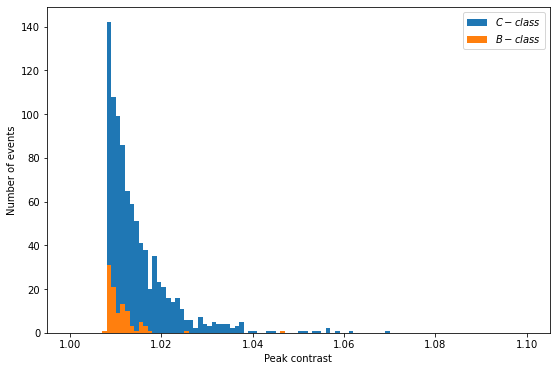

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 173., 129., 108.,
         99.,  75.,  62.,  52.,  46.,  41.,  21.,  35.,  23.,  21.,  16.,
         14.,  16.,  11.,   7.,   6.,   2.,   7.,   4.,   3.,   5.,   4.,
          4.,   4.,   2.,   3.,   5.,   0.,   1.,   1.,   0.,   0.,   1.,
          1.,   0.,   2.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006, 1.007, 1.008,
        1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015, 1.016, 1.017,
        1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024, 1.025, 1.026,
        1.027, 1.028, 1.029, 1.03 , 1.031, 1.032, 1.033, 1.034, 1.035,
        1.036, 1.037, 1.038, 1.039

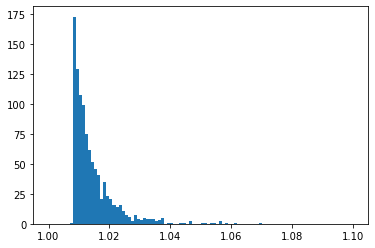

In [2]:
#sheet_new['SIGNIF(%)'].hist()
plt.figure(figsize=(9, 6))
plt.hist(sheet_new_C['CON'], bins = 100, range=(1,1.1),label = r'$C-class$') #bins代表条形箱子的个数
plt.hist(sheet_new_B['CON'], bins = 100, range=(1,1.1),label = r'$B-class$') #bins代表条形箱子的个数
plt.xlabel('Peak contrast')

plt.ylabel('Number of events')
plt.legend() #图例

plt.show()
plt.hist(sheet_new['CON'], bins = 100, range=(1,1.1),label = r'$B-class$') #bins代表条形箱子的个数

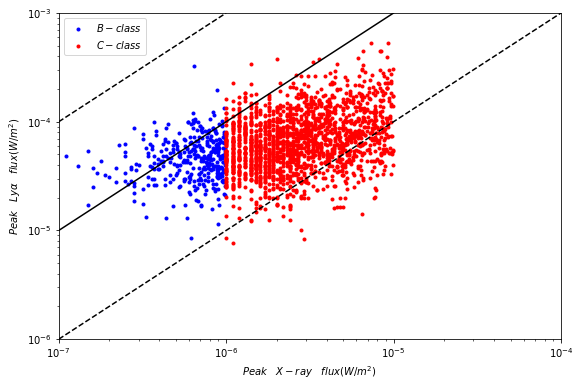

In [5]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheet_new_B=sheet_new
sheet_new_B=sheet_new_B[sheet_new_B['SIGN'] == 1]
sheet_new_C=sheet_new
sheet_new_C=sheet_new_C[sheet_new_C['SIGN'] == 0]

x=sheet_new_B['CLASS_N']
y=sheet_new_B['SUB']

x1=sheet_new_C['CLASS_N']
y1=sheet_new_C['SUB']

x2=[10**(-7),10**(-4)]
y2=[10**(-6),10**(-3)]
x3=[10**(-7),10**(-5)]
y3=[10**(-5),10**(-3)]
x4=[10**(-7),10**(-6)]
y4=[10**(-4),10**(-3)]

plt.figure(figsize=(9, 6))
#plt.scatter(x, y)
plt.loglog(x, y,'b.',label=r'$B-class$')
plt.loglog(x1,y1,'r.',label=r'$C-class$')

plt.plot(x2,y2,'--',color='black')
plt.plot(x3,y3,'-',color='black')
plt.plot(x4,y4,'--',color='black')

plt.ylim(10**(-6),10**(-3))
plt.xlim(10**(-7),10**(-4))

plt.xlabel(r'$Peak \quad X-ray \quad flux (W/m^2)$')
plt.ylabel(r'$Peak \quad Lyα \quad flux (W/m^2)$')
plt.legend() #图例
plt.show()

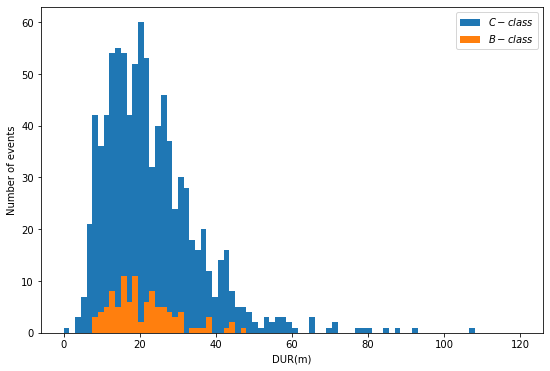

In [4]:
#sheet_new['SIGNIF(%)'].hist()
plt.figure(figsize=(9, 6))
plt.hist(sheet_new_C['DUR(m)'], bins = 80, range=(0,120),label = r'$C-class$') #bins代表条形箱子的个数
plt.hist(sheet_new_B['DUR(m)'], bins = 80, range=(0,120),label = r'$B-class$') #bins代表条形箱子的个数
plt.xlabel('DUR(m)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.show()

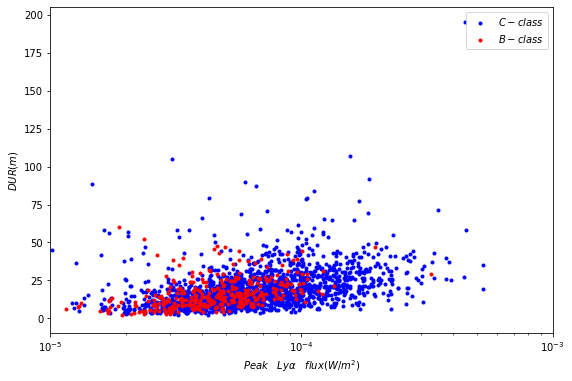

In [7]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
plt.xlim(10**(-5),10**(-3))
plt.plot(sheet_new_C['SUB'],sheet_new_C['DUR(m)'],'b.',label = r'$C-class$')
plt.plot(sheet_new_B['SUB'],sheet_new_B['DUR(m)'],'r.',label = r'$B-class$')
plt.xlabel(r'$Peak \quad Lyα \quad flux (W/m^2)$')
plt.ylabel(r'$DUR(m)$')
plt.legend() #图例

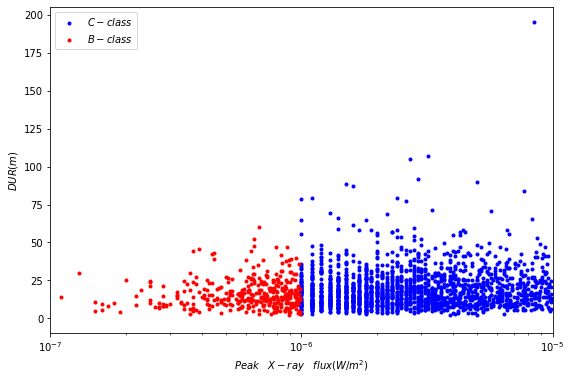

In [8]:
#这个不对
plt.figure(figsize=(9, 6))
plt.xscale('log')
plt.xlim(10**(-7),10**(-5))
plt.plot(sheet_new_C['CLASS_N'],sheet_new_C['DUR(m)'],'b.',label = r'$C-class$')
plt.plot(sheet_new_B['CLASS_N'],sheet_new_B['DUR(m)'],'r.',label = r'$B-class$')
plt.xlabel(r'$Peak \quad X-ray \quad flux (W/m^2)$')
plt.ylabel(r'$DUR(m)$')
plt.legend() #图例

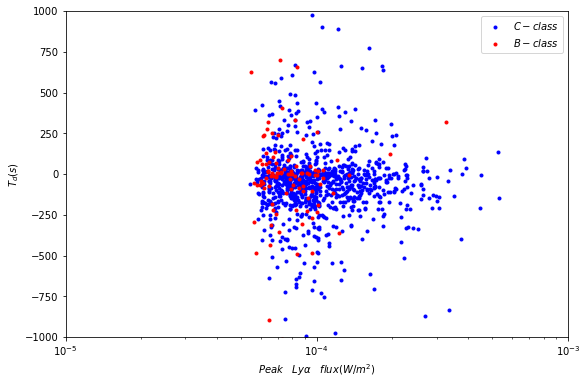

In [9]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
plt.xlim(10**(-5),10**(-3))
plt.ylim(-1000,1000)
plt.plot(sheet_new_C['SUB'],sheet_new_C['T_D'],'b.',label = r'$C-class$')
plt.plot(sheet_new_B['SUB'],sheet_new_B['T_D'],'r.',label = r'$B-class$')

plt.xlabel(r'$Peak \quad Lyα \quad flux (W/m^2)$')
plt.ylabel(r'$T_d(s)$')
plt.legend() #图例

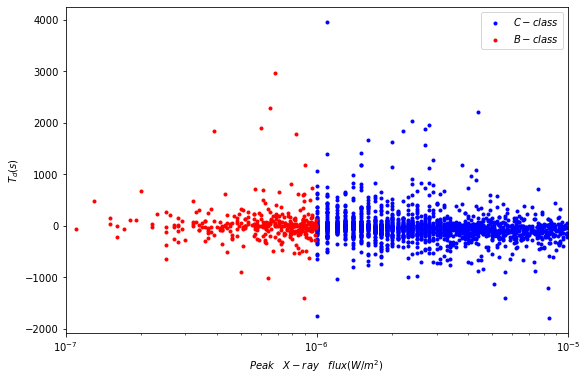

In [10]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
plt.xlim(10**(-7),10**(-5))
plt.plot(sheet_new_C['CLASS_N'],sheet_new_C['T_D'],'b.',label = r'$C-class$')
plt.plot(sheet_new_B['CLASS_N'],sheet_new_B['T_D'],'r.',label = r'$B-class$')
plt.xlabel(r'$Peak \quad X-ray \quad flux (W/m^2)$')
plt.ylabel(r'$T_d(s)$')
plt.legend() #图例

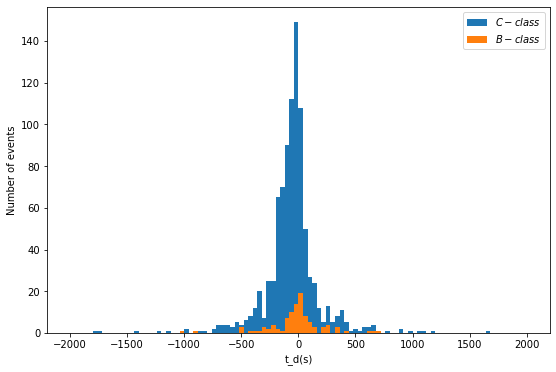

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

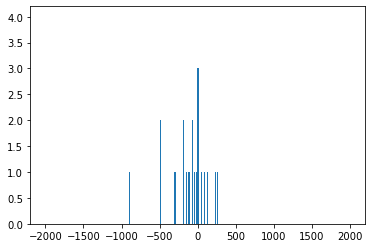

In [8]:
#sheet_new['SIGNIF(%)'].hist()
plt.figure(figsize=(9, 6))
plt.hist(sheet_new_C['T_D'], bins = 100, range=(-2000,2000),label = r'$C-class$') #bins代表条形箱子的个数
plt.hist(sheet_new_B['T_D'], bins = 100, range=(-2000,2000),label = r'$B-class$') #bins代表条形箱子的个数
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.show()
plt.hist(sheet_new_B['T_D'], bins = 1000, range=(-2000,2000),label = r'$B-class$') #bins代表条形箱子的个数


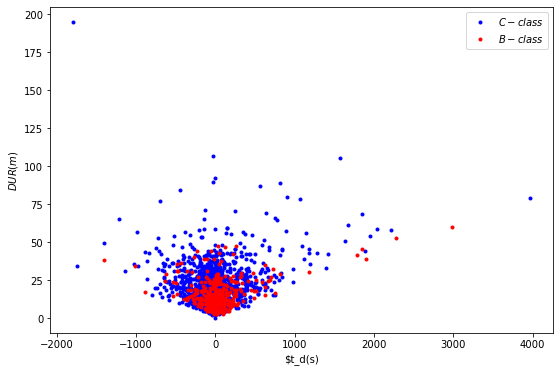

In [12]:
plt.figure(figsize=(9, 6))
#plt.xscale('log')
#plt.xlim(10**(-7),10**(-5))
plt.plot(sheet_new_C['T_D'],sheet_new_C['DUR(m)'],'b.',label = r'$C-class$')
plt.plot(sheet_new_B['T_D'],sheet_new_B['DUR(m)'],'r.',label = r'$B-class$')
plt.xlabel(r'$t_d(s)')
plt.ylabel(r'$DUR(m)$')
plt.legend() #图例

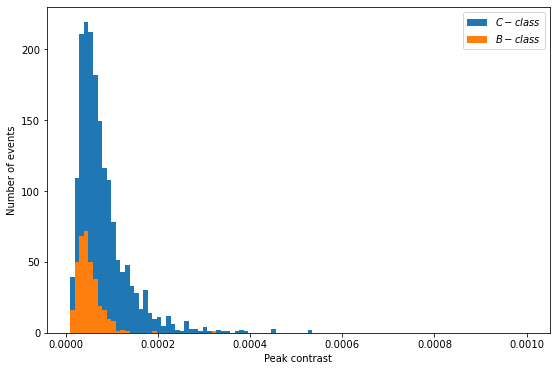

In [13]:
#sheet_new['SIGNIF(%)'].hist()
plt.figure(figsize=(9, 6))
plt.hist(sheet_new_C['SUB'], bins = 100, range=(10**(-5),10**(-3)),label = r'$C-class$') #bins代表条形箱子的个数
plt.hist(sheet_new_B['SUB'], bins = 100, range=(10**(-5),10**(-3)),label = r'$B-class$') #bins代表条形箱子的个数
plt.xlabel('Peak contrast')
plt.ylabel('Number of events')
plt.legend() #图例

plt.show()

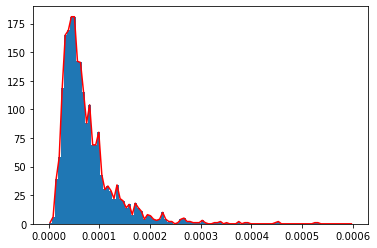

In [18]:
n, bins, patches =plt.hist(sheet_new['SUB'], bins = 100, range=(0,6*10**(-4)),label = r'$C-class$') #bins代表条形箱子的个数
#euve_a[1]=euve_a[1][0:-1]

#plt.loglog(euve_a[0],euve_a[1],'b.')
plt.plot(bins[0:-1]+((bins[1]-bins[0])/2.0),n,color='red')#利用返回值来绘制区间中点连线


<ipython-input-19-e04c22437088>:13: RuntimeWarning: divide by zero encountered in log10
  d=np.log10(euve_v[n])


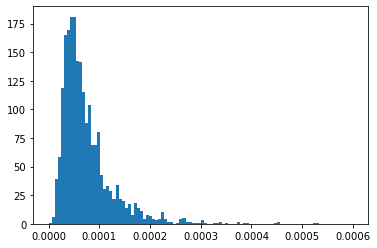

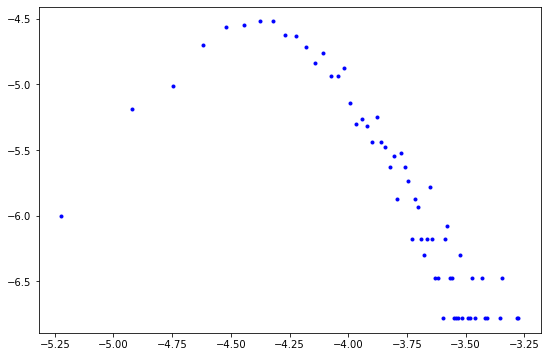

In [19]:
euve_a=plt.hist(sheet_new['SUB'], bins = 100, range=(0,6*10**(-4)),label = r'$C-class$') #bins代表条形箱子的个数
euve_p=euve_a[0]/(6*10**(6))
euve_v=euve_a[1][0:-1]
n=0
#print(euve_p)
plt.figure(figsize=(9, 6))
#plt.scatter(x, y)
a=[]
b=[]
for n in range(100):
    if euve_p[n] !=0:
        c=np.log10(euve_p[n])
        d=np.log10(euve_v[n])
        #print(c)
        a.append(c)
        b.append(d)
        #print(n)
#print(a)  
plt.plot(b, a,'b.',label=r'$B-class$')
#plt.axis('equal')#使轴比例尺相同